# Tiny ImageNet

## Imports

In [1]:
import sys 
import numpy as np 
import matplotlib.pyplot as plt


import torch
import torchvision 
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.sampler import SubsetRandomSampler

sys.path.insert(0, '../../Utils/')

import models
from train import *
from metrics import * 
from data_downloaders import * 

print("Python: %s" % sys.version)
print("Pytorch: %s" % torch.__version__)

# determine device to run network on (runs on gpu if available)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


Python: 3.6.5 (default, Jun 21 2018, 23:07:39) 
[GCC 5.4.0 20160609]
Pytorch: 0.4.0


## Hyperparameters

In [2]:
n_epochs = 50
batch_size = 128
lr = 0.001
k = 3


## Load Tiny ImageNet
### https://tiny-imagenet.herokuapp.com/

Tiny ImageNet successfully downloaded and preprocessed.


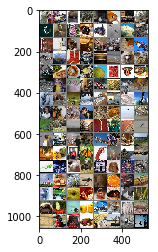

In [3]:
get_tiny_imagenet('../../Datasets/')

train_dir = "../../Datasets/tiny-imagenet-200/train"
test_dir = "../../Datasets/tiny-imagenet-200/val"


# Data augmentation 
train_transform = torchvision.transforms.Compose([
    #torchvision.transforms.RandomRotation(10),
    #torchvision.transforms.RandomHorizontalFlip(),
    #torchvision.transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
 
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_transform = torchvision.transforms.Compose([
    #torchvision.transforms.Pad(2),
    torchvision.transforms.ToTensor(),
    #torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    torchvision.transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])
    



# load training set 
trainset = torchvision.datasets.ImageFolder(train_dir, transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

# load test set 
testset = torchvision.datasets.ImageFolder(test_dir, transform=test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)

# helper function to unnormalize and plot image 
def imshow(img):
    img = np.array(img)
    img = img / 2 + 0.5
    img = np.moveaxis(img, 0, -1)
    plt.imshow(img)
    
# display sample from dataset 
imgs,labels = iter(trainloader).next()
imshow(torchvision.utils.make_grid(imgs))  

## Train Model 

In [4]:
net = models.tiny_cnn(n_in=3, n_out=200, n_hidden=128, size=64).to(device)

net.apply(models.weights_init)

loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=lr)

In [5]:
train(net, trainloader, testloader, optimizer, loss, n_epochs, verbose=True)

[0/50][0/782] loss = 6.474614
[0/50][1/782] loss = 161.970230
[0/50][2/782] loss = 115.294968
[0/50][3/782] loss = 109.035370
[0/50][4/782] loss = 106.169052
[0/50][5/782] loss = 101.565758
[0/50][6/782] loss = 119.081238
[0/50][7/782] loss = 128.964432
[0/50][8/782] loss = 121.236771
[0/50][9/782] loss = 139.709335
[0/50][10/782] loss = 124.624756
[0/50][11/782] loss = 125.693932
[0/50][12/782] loss = 124.923500
[0/50][13/782] loss = 109.606628
[0/50][14/782] loss = 121.727165
[0/50][15/782] loss = 109.577873
[0/50][16/782] loss = 96.271606
[0/50][17/782] loss = 99.597633
[0/50][18/782] loss = 93.937653
[0/50][19/782] loss = 99.542892
[0/50][20/782] loss = 91.345436
[0/50][21/782] loss = 96.874969
[0/50][22/782] loss = 107.841904
[0/50][23/782] loss = 89.346413
[0/50][24/782] loss = 82.590958
[0/50][25/782] loss = 95.822144
[0/50][26/782] loss = 83.691536
[0/50][27/782] loss = 65.801994
[0/50][28/782] loss = 92.403206
[0/50][29/782] loss = 75.928322
[0/50][30/782] loss = 67.642876
[0/

[0/50][253/782] loss = 6.519938
[0/50][254/782] loss = 6.486855
[0/50][255/782] loss = 6.248848
[0/50][256/782] loss = 5.956722
[0/50][257/782] loss = 5.771904
[0/50][258/782] loss = 7.030641
[0/50][259/782] loss = 5.840317
[0/50][260/782] loss = 6.476951
[0/50][261/782] loss = 6.314500
[0/50][262/782] loss = 5.991454
[0/50][263/782] loss = 6.477569
[0/50][264/782] loss = 6.968050
[0/50][265/782] loss = 5.876950
[0/50][266/782] loss = 6.308601
[0/50][267/782] loss = 5.921152
[0/50][268/782] loss = 5.768412
[0/50][269/782] loss = 6.102837
[0/50][270/782] loss = 5.777797
[0/50][271/782] loss = 6.107260
[0/50][272/782] loss = 6.178821
[0/50][273/782] loss = 6.312507
[0/50][274/782] loss = 5.885828
[0/50][275/782] loss = 5.706679
[0/50][276/782] loss = 5.833700
[0/50][277/782] loss = 5.488290
[0/50][278/782] loss = 5.450049
[0/50][279/782] loss = 6.088770
[0/50][280/782] loss = 6.284987
[0/50][281/782] loss = 5.912473
[0/50][282/782] loss = 5.417754
[0/50][283/782] loss = 5.887277
[0/50][2

Process Process-3:
Process Process-4:
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 52, in _worker_loop
    r = index_queue.get()
  File "/usr/local/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/local/lib/python3.6/multiprocessing/queues.py", line 335, in get
    res = self._reader.recv_bytes()
  File "/usr/local/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/usr/local/lib/python3.6/site-packages/torch/utils/data/datalo

[0/50][288/782] loss = 5.963528


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7efe28d58f98>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 347, in __del__
    def __del__(self):
  File "/usr/local/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 178, in handler
    _error_if_any_worker_fails()
RuntimeError: DataLoader worker (pid 98971) exited unexpectedly with exit code 1.


KeyboardInterrupt: 